# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import Dependencies
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key = "1c72d622f04df7843d726e50b224567d"

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"+ api_key

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)

633


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# create empty lists
lat = []
lng = []
city_name = []
humidity = []
cloudiness = []
max_temp = []
wind_speed = []
country = []
date = []

# call counter
count = 1

for city in cities:
     
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city 
    
    # Get data
    try:
        response = requests.get(query_url).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        city_name.append(response["name"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {count} | {city_record}")
    
        # Increase counter by one 
        count = count + 1 
        
    except:
        print("City not found. Skipping...")
    
    continue




Processing Record 1 | Norsup
Processing Record 2 | Avarua
Processing Record 3 | Pangnirtung
Processing Record 4 | Lompoc
Processing Record 5 | Dingle
Processing Record 6 | Punta Arenas
Processing Record 7 | Mar del Plata
Processing Record 8 | Padang
Processing Record 9 | Korop
Processing Record 10 | Butaritari
Processing Record 11 | Senno
City not found. Skipping...
Processing Record 12 | Derzhavinsk
Processing Record 13 | Ushuaia
Processing Record 14 | Bredasdorp
Processing Record 15 | Waingapu
Processing Record 16 | Kodiak
City not found. Skipping...
City not found. Skipping...
Processing Record 17 | Jamestown
Processing Record 18 | Vestmannaeyjar
Processing Record 19 | Rikitea
Processing Record 20 | Buchanan
Processing Record 21 | Shchigry
Processing Record 22 | Newton
Processing Record 23 | Ulaanbaatar
Processing Record 24 | Mataura
Processing Record 25 | San Cristobal
Processing Record 26 | Fortuna
Processing Record 27 | Komsomolskiy
Processing Record 28 | Northam
Processing Recor

Processing Record 232 | Hofn
Processing Record 233 | Bambous Virieux
City not found. Skipping...
Processing Record 234 | Lazaro Cardenas
Processing Record 235 | Vila Velha
Processing Record 236 | Neyshabur
Processing Record 237 | Chokurdakh
Processing Record 238 | Wasilla
Processing Record 239 | Nanortalik
Processing Record 240 | Prado
Processing Record 241 | Ilulissat
Processing Record 242 | Zubutli-Miatli
Processing Record 243 | Omboue
Processing Record 244 | Port Alfred
Processing Record 245 | Amarillo
Processing Record 246 | Manaus
Processing Record 247 | Gien
Processing Record 248 | Eltham
Processing Record 249 | Srednekolymsk
Processing Record 250 | Gitarama
City not found. Skipping...
Processing Record 251 | Plouzane
Processing Record 252 | North Battleford
Processing Record 253 | Teya
Processing Record 254 | Maun
Processing Record 255 | Ghatsila
Processing Record 256 | Gujranwala
Processing Record 257 | Norman Wells
Processing Record 258 | Bitlis
City not found. Skipping...
Pro

Processing Record 457 | Sann
City not found. Skipping...
Processing Record 458 | Udachnyy
Processing Record 459 | Pasighat
Processing Record 460 | Rome
Processing Record 461 | Orlik
Processing Record 462 | Avera
Processing Record 463 | Mount Gambier
Processing Record 464 | Ratnagiri
Processing Record 465 | Xiuyan
Processing Record 466 | Shelburne
Processing Record 467 | Torbat-e Jam
Processing Record 468 | Saint-Joseph
Processing Record 469 | San Cosme y Damian
Processing Record 470 | Kahului
Processing Record 471 | Smolenka
Processing Record 472 | Grindavik
Processing Record 473 | Ketchikan
Processing Record 474 | Arroyo
Processing Record 475 | Changli
Processing Record 476 | Taldan
Processing Record 477 | Dayong
Processing Record 478 | Ust-Omchug
Processing Record 479 | Palghar
Processing Record 480 | Rypefjord
Processing Record 481 | Tupsan
Processing Record 482 | Balkanabat
Processing Record 483 | Dom Pedrito
Processing Record 484 | Makakilo City
Processing Record 485 | Kitimat
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# create dictionaries
weather = {"City": city_name, "Cloudiness": cloudiness,
           "Country": country, "Date": date,
           "Humidity": humidity, "Lat": lat,
           "Lng": lng, "Max Temp": max_temp,
           "Wind Speed": wind_speed}

# create dataframe
weather_df = pd.DataFrame(weather)

# count
weather_df.count()


City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [16]:
# make csv 
weather_df.to_csv('weather_df.csv')

# show DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Norsup,75,VU,1561583886,94,-16.07,167.38,299.15,3.10
1,Avarua,71,CK,1561583886,78,-21.21,-159.78,297.15,2.10
2,Pangnirtung,20,CA,1561583887,75,66.15,-65.72,280.15,2.10
3,Lompoc,1,US,1561583887,68,34.64,-120.46,296.15,8.20
4,Dingle,100,PH,1561583888,88,11.00,122.67,297.30,2.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

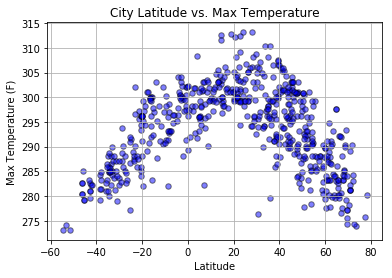

In [25]:
# create vairables
latit = weather_df["Lat"]
max_temp = weather_df["Max Temp"]

# create scatter plot
lat_temp = plt.scatter(latit, max_temp, marker="o", color="blue", edgecolors="black",
                      s=30, alpha=0.5)

# graph properties 
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

#### Latitude vs. Humidity Plot

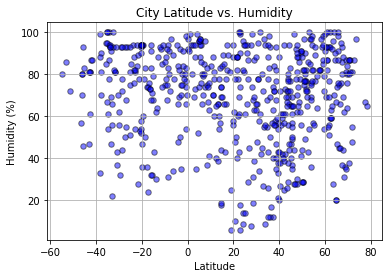

In [26]:
# variables 
humidity_plt = weather_df["Humidity"]

# scatter plot
lat_hum = plt.scatter(latit, humidity_plt, marker="o", color="blue", edgecolors="black",
                      s=30, alpha=0.5 )
# graph properties 
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

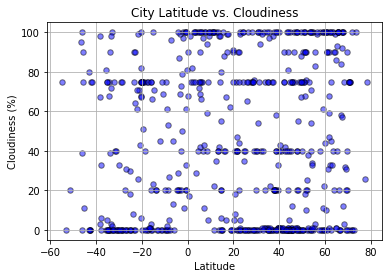

In [29]:
# vairables
cloud = weather_df["Cloudiness"]

# scatter plot
lat_cloud = plt.scatter(latit, cloud, marker="o", color="blue", edgecolors="black",
                      s=30, alpha=0.5 )
# graph properties 
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
          

#### Latitude vs. Wind Speed Plot

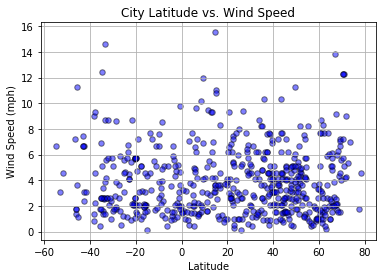

In [30]:
# variable
speed = weather_df["Wind Speed"]

# scatter plot
lat_speed = plt.scatter(latit, speed, marker="o", color="blue", edgecolors="black",
                      s=30, alpha=0.5 )
# graph properties 
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()